# Regression in Python

***
This is a very quick run-through of some basic statistical concepts, adapted from [Lab 4 in Harvard's CS109](https://github.com/cs109/2015lab4) course. Please feel free to try the original lab if you're feeling ambitious :-) The CS109 git repository also has the solutions if you're stuck.

* Linear Regression Models
* Prediction using linear regression

Linear regression is used to model and predict continuous outcomes with normal random errors. There are nearly an infinite number of different types of regression models and each regression model is typically defined by the distribution of the prediction errors (called "residuals") of the type of data. Logistic regression is used to model binary outcomes whereas Poisson regression is used to predict counts. In this exercise, we'll see some examples of linear regression as well as Train-test splits.

The packages we'll cover are: `statsmodels`, `seaborn`, and `scikit-learn`. While we don't explicitly teach `statsmodels` and `seaborn` in the Springboard workshop, those are great libraries to know.
***

<img width=600 height=300 src="https://imgs.xkcd.com/comics/sustainable.png"/>
***

In [1]:
# special IPython command to prepare the notebook for matplotlib and other libraries
%matplotlib inline 

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn

import seaborn as sns

# special matplotlib argument for improved plots
from matplotlib import rcParams
sns.set_style("whitegrid")
sns.set_context("poster")
plt.style.use('ggplot')

***
# Part 1: Introduction to Linear Regression
### Purpose of linear regression
***
<div class="span5 alert alert-info">

<p> Given a dataset containing predictor variables $X$ and outcome/response variable $Y$, linear regression can be used to: </p>
<ul>
  <li> Build a <b>predictive model</b> to predict future values of $\hat{Y}$, using new data $X^*$ where $Y$ is unknown.</li>
  <li> Model the <b>strength of the relationship</b> between each independent variable $X_i$ and $Y$</li>
    <ul>
      <li> Many times, only a subset of independent variables $X_i$ will have a linear relationship with $Y$</li>
      <li> Need to figure out which $X_i$ contributes most information to predict $Y$ </li>
    </ul>
   <li>It is in many cases, the first pass prediction algorithm for continuous outcomes. </li>
</ul>
</div>

### A Brief Mathematical Recap
***

[Linear Regression](http://en.wikipedia.org/wiki/Linear_regression) is a method to model the relationship between a set of independent variables $X$ (also knowns as explanatory variables, features, predictors) and a dependent variable $Y$.  This method assumes the relationship between each predictor $X$ is **linearly** related to the dependent variable $Y$. The most basic linear regression model contains one independent variable $X$, we'll call this the simple model. 

$$ Y = \beta_0 + \beta_1 X + \epsilon$$

where $\epsilon$ is considered as an unobservable random variable that adds noise to the linear relationship. In linear regression, $\epsilon$ is assumed to be normally distributed with a mean of 0. In other words, what this means is that on average, if we know $Y$, a roughly equal number of predictions $\hat{Y}$ will be above $Y$ and others will be below $Y$. That is, on average, the error is zero. The residuals, $\epsilon$ are also assumed to be "i.i.d.": independently and identically distributed. Independence means that the residuals are not correlated -- the residual from one prediction has no effect on the residual from another prediction. Correlated errors are common in time series analysis and spatial analyses.

* $\beta_0$ is the intercept of the linear model and represents the average of $Y$ when all independent variables $X$ are set to 0.

* $\beta_1$ is the slope of the line associated with the regression model and represents the average effect of a one-unit increase in $X$ on $Y$.

* Back to the simple model. The model in linear regression is the *conditional mean* of $Y$ given the values in $X$ is expressed a linear function.  

$$ y = f(x) = E(Y | X = x)$$ 

![conditional mean](images/conditionalmean.png)
http://www.learner.org/courses/againstallodds/about/glossary.html

* The goal is to estimate the coefficients (e.g. $\beta_0$ and $\beta_1$). We represent the estimates of the coefficients with a "hat" on top of the letter.  

$$ \hat{\beta}_0, \hat{\beta}_1 $$

* Once we estimate the coefficients $\hat{\beta}_0$ and $\hat{\beta}_1$, we can use these to predict new values of $Y$ given new data $X$.

$$\hat{y} = \hat{\beta}_0 + \hat{\beta}_1 x_1$$

* Multiple linear regression is when you have more than one independent variable and the estimation involves matrices
    * $X_1$, $X_2$, $X_3$, $\ldots$


* How do you estimate the coefficients? 
    * There are many ways to fit a linear regression model
    * The method called **least squares** is the most common methods
    * We will discuss least squares

$$ Y = \beta_0 + \beta_1 X_1 + \ldots + \beta_p X_p + \epsilon$$ 
    
### Estimating $\hat\beta$: Least squares
***
[Least squares](http://en.wikipedia.org/wiki/Least_squares) is a method that can estimate the coefficients of a linear model by minimizing the squared residuals: 

$$ \mathscr{L} = \sum_{i=1}^N \epsilon_i^2 = \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2  = \sum_{i=1}^N \left(y_i - \left(\hat{\beta_0} + \hat{\beta_1} x_i\right)\right)^2 $$

where $N$ is the number of observations and $\epsilon$ represents a residual or error, ACTUAL - PREDICTED.  

#### Estimating the intercept $\hat{\beta_0}$ for the simple linear model

We want to minimize the squared residuals and solve for $\hat{\beta_0}$ so we take the partial derivative of $\mathscr{L}$ with respect to $\hat{\beta_0}$ 

$
\begin{align}
\frac{\partial \mathscr{L}}{\partial \hat{\beta_0}} &= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \epsilon^2 \\
&= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2 \\
&= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right)^2 \\
&= -2 \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right) \hspace{25mm} \mbox{(by chain rule)} \\
&= -2 \sum_{i=1}^N y_i - \hat{\beta}_0 - \hat{\beta}_1 x_i \\
&= -2 \left[ \left( \sum_{i=1}^N y_i \right) - n \hat{\beta_0} - \hat{\beta}_1 \left( \sum_{i=1}^N x_i
\right) \right] \\
& 2 \left[ n \hat{\beta}_0 + \hat{\beta}_1 \sum_{i=1}^N x_i - \sum_{i=1}^N y_i \right] = 0 \hspace{20mm} \mbox{(Set equal to 0 and solve for $\hat{\beta}_0$)} \\
& n \hat{\beta}_0 + \hat{\beta}_1 \sum_{i=1}^N x_i - \sum_{i=1}^N y_i = 0 \\
& n \hat{\beta}_0 = \sum_{i=1}^N y_i - \hat{\beta}_1 \sum_{i=1}^N x_i \\
& \hat{\beta}_0 = \frac{\sum_{i=1}^N y_i - \hat{\beta}_1 \sum_{i=1}^N x_i}{n} \\
& \hat{\beta}_0 = \frac{\sum_{i=1}^N y_i}{n} - \hat{\beta}_1 \frac{\sum_{i=1}^N x_i}{n} \\
& \boxed{\hat{\beta}_0 = \bar{y} - \hat{\beta}_1 \bar{x}}
\end{align}
$

Using this new information, we can compute the estimate for $\hat{\beta}_1$ by taking the partial derivative of $\mathscr{L}$ with respect to $\hat{\beta}_1$.

$
\begin{align}
\frac{\partial \mathscr{L}}{\partial \hat{\beta_1}} &= \frac{\partial}{\partial \hat{\beta_1}} \sum_{i=1}^N \epsilon^2 \\
&= \frac{\partial}{\partial \hat{\beta_1}} \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2 \\
&= \frac{\partial}{\partial \hat{\beta_1}} \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right)^2 \\
&= 2 \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right) \left( -x_i \right) \hspace{25mm}\mbox{(by chain rule)} \\
&= -2 \sum_{i=1}^N x_i \left( y_i - \hat{\beta}_0 - \hat{\beta}_1 x_i \right) \\
&= -2 \sum_{i=1}^N x_i y_i - \hat{\beta}_0 x_i - \hat{\beta}_1 x_i^2 \\
&= -2 \sum_{i=1}^N x_i y_i - \left( \bar{y} - \hat{\beta}_1 \bar{x} \right) x_i - \hat{\beta}_1 x_i^2 \\
&= -2 \sum_{i=1}^N x_i y_i - \bar{y}x_i + \hat{\beta}_1\bar{x}x_i - \hat{\beta}_1 x_i^2 \\
&= -2 \left[ \sum_{i=1}^N x_i y_i - \bar{y} \sum_{i=1}^N x_i + \hat{\beta}_1\bar{x} - \hat{\beta}_1 x_i^2 \right] \\
&= -2 \left[ \hat{\beta}_1 \left\{ \bar{x} \sum_{i=1}^N x_i - \sum_{i=1}^N x_i^2 \right\} + \left\{ \sum_{i=1}^N x_i y_i - \bar{y} \sum_{i=1}^N x_i \right\}\right] \\
& 2 \left[ \hat{\beta}_1 \left\{ \sum_{i=1}^N x_i^2 - \bar{x} \sum_{i=1}^N x_i \right\} + \left\{ \bar{y} \sum_{i=1}^N x_i - \sum_{i=1}^N x_i y_i \right\} \right] = 0 \\
& \hat{\beta}_1 = \frac{-\left( \bar{y} \sum_{i=1}^N x_i - \sum_{i=1}^N x_i y_i \right)}{\sum_{i=1}^N x_i^2 - \bar{x}\sum_{i=1}^N x_i} \\
&= \frac{\sum_{i=1}^N x_i y_i - \bar{y} \sum_{i=1}^N x_i}{\sum_{i=1}^N x_i^2 - \bar{x} \sum_{i=1}^N x_i} \\
& \boxed{\hat{\beta}_1 = \frac{\sum_{i=1}^N x_i y_i - \bar{x}\bar{y}n}{\sum_{i=1}^N x_i^2 - n \bar{x}^2}}
\end{align}
$

The solution can be written in compact matrix notation as

$$\hat\beta =  (X^T X)^{-1}X^T Y$$ 

We wanted to show you this in case you remember linear algebra, in order for this solution to exist we need $X^T X$ to be invertible. Of course this requires a few extra assumptions, $X$ must be full rank so that $X^T X$ is invertible, etc. Basically, $X^T X$ is full rank if all rows and columns are linearly independent. This has a loose relationship to variables and observations being independent respective. **This is important for us because this means that having redundant features in our regression models will lead to poorly fitting (and unstable) models.** We'll see an implementation of this in the extra linear regression example.

***
# Part 2: Exploratory Data Analysis for Linear Relationships

The [Boston Housing data set](https://archive.ics.uci.edu/ml/datasets/Housing) contains information about the housing values in suburbs of Boston.  This dataset was originally taken from the StatLib library which is maintained at Carnegie Mellon University and is now available on the UCI Machine Learning Repository. 


## Load the Boston Housing data set from `sklearn`
***

This data set is available in the [sklearn](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html#sklearn.datasets.load_boston) python module which is how we will access it today.  

In [2]:
from sklearn.datasets import load_boston
import pandas as pd

boston = load_boston()

In [3]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

In [4]:
boston.data.shape

(506, 13)

In [5]:
# Print column names
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [6]:
# Print description of Boston housing data set
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

Now let's explore the data set itself. 

In [7]:
bos = pd.DataFrame(boston.data)
bos.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


There are no column names in the DataFrame. Let's add those. 

In [8]:
bos.columns = boston.feature_names
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


Now we have a pandas DataFrame called `bos` containing all the data we want to use to predict Boston Housing prices.  Let's create a variable called `PRICE` which will contain the prices. This information is contained in the `target` data. 

In [9]:
print(boston.target.shape)

(506,)


In [10]:
bos['PRICE'] = boston.target
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## EDA and Summary Statistics
***

Let's explore this data set.  First we use `describe()` to get basic summary statistics for each of the columns. 

In [11]:
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Scatterplots
***

Let's look at some scatter plots for three variables: 'CRIM' (per capita crime rate), 'RM' (number of rooms) and 'PTRATIO' (pupil-to-teacher ratio in schools).  

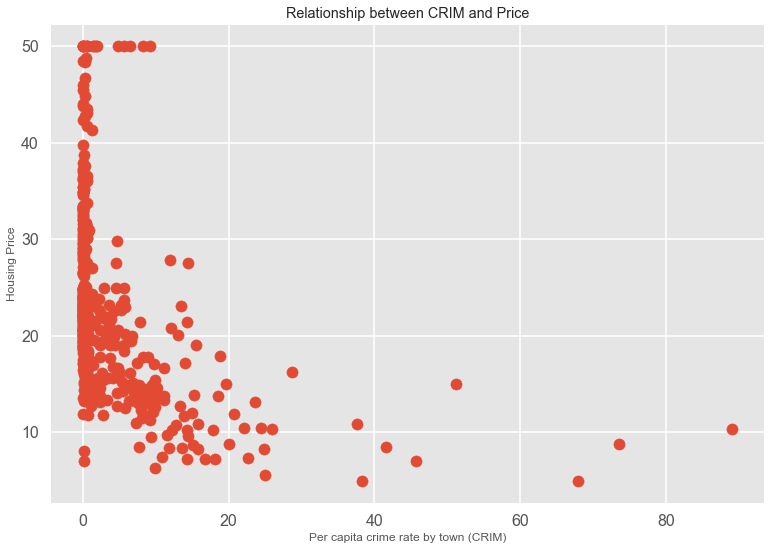

In [12]:
plt.scatter(bos.CRIM, bos.PRICE)
plt.xlabel("Per capita crime rate by town (CRIM)")
plt.ylabel("Housing Price")
plt.title("Relationship between CRIM and Price")

<div class="span5 alert alert-info">
<h3>Part 2 Checkup Exercise Set I</h3>

<p><b>Exercise:</b> What kind of relationship do you see? e.g. positive, negative?  linear? non-linear? Is there anything else strange or interesting about the data? What about outliers?</p>


<p><b>Exercise:</b> Create scatter plots between *RM* and *PRICE*, and *PTRATIO* and *PRICE*. Label your axes appropriately using human readable labels. Tell a story about what you see.</p>

<p><b>Exercise:</b> What are some other numeric variables of interest? Why do you think they are interesting? Plot scatterplots with these variables and *PRICE* (house price) and tell a story about what you see.</p>

</div>

There seems to be a nonlinear relationship between crime ratio and median price rather than a linear relationship. This is clearer when we show the same data using a log scale for the x-values to better separate the small crime values, as most town have small crime values.

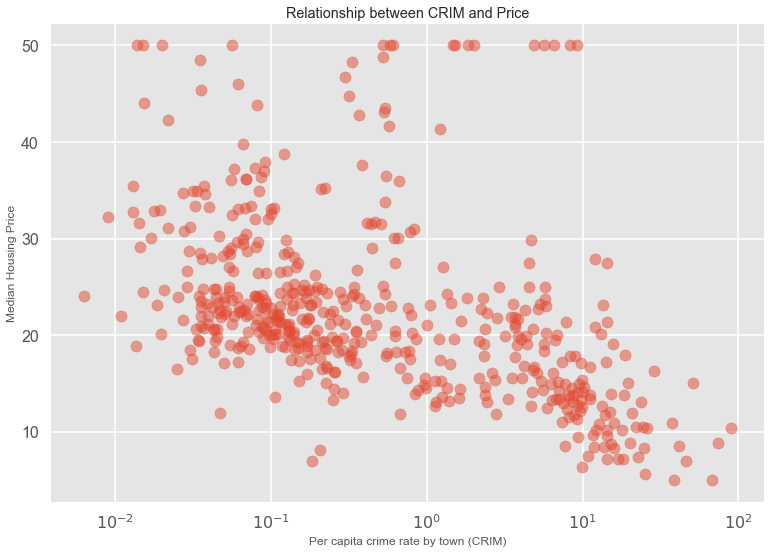

In [13]:
# scatter plot  between CRIM and PRICE
plt.xscale('log')
plt.scatter(bos.CRIM, bos.PRICE, alpha=.5)
plt.xlabel("Per capita crime rate by town (CRIM)")
plt.ylabel("Median Housing Price")
plt.title("Relationship between CRIM and Price");

While the linear relationship still is not strong we can imagine a sloped down line representing the average behavior. This indicates that there is a negative exponential relation between Crime and Price. That is: as the crime rate increases the median price decreases exponentially!

We also observe that there seems to be a cap for price at 50. Let's check it by looking at the actual values of the price variable.

In [14]:
(bos.PRICE.value_counts())[:10,]

50.0    16
25.0     8
23.1     7
21.7     7
22.0     7
20.6     6
19.4     6
20.1     5
19.6     5
19.3     5
Name: PRICE, dtype: int64

In [15]:
print('Number of township with median price equal to {0:.0f}: {1}'.format(bos.PRICE.max(), (bos.PRICE == bos.PRICE.max()).sum()))
print('Number of township with median price equal to {0:.0f}: {1}'.format(bos.PRICE.min(), (bos.PRICE == bos.PRICE.min()).sum()))

Number of township with median price equal to 50: 16
Number of township with median price equal to 5: 2


Indeed, we see that there are 16 towns with a median price of 50, the highest value. There are also two township with value of 5, the lowest value, so there might have possibly been a low cap as well.

Next we look at the relationship between average number of rooms and price.

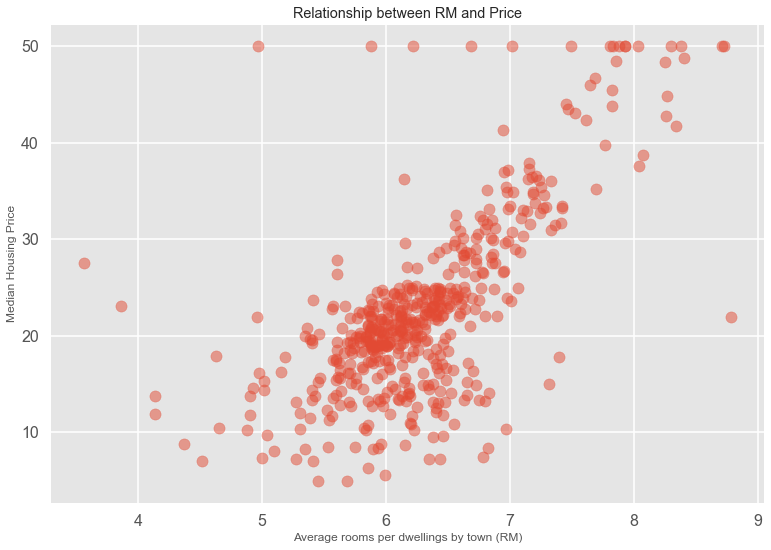

In [16]:
# scatter plot between *RM* and *PRICE*
plt.scatter(bos.RM, bos.PRICE, alpha=.5)
plt.xlabel("Average rooms per dwellings by town (RM)")
plt.ylabel("Median Housing Price")
plt.title("Relationship between RM and Price");

As expected there is a moderately strong linear relationship between average number of rooms and median price. As the number of rooms increases the median price increases as well. That is: neighborhoods with bigger houses demand a higher price. WE also notice that some of the neigborhoods with higher prices don't follow the linear relationship very well, as the number of average rooms can be as low as 5 versus a value of 8 to 9, as indicated by the linear relationship. We will dig a little deeper into this later. 

Next we look at how students/teacher ratios influence home prices.

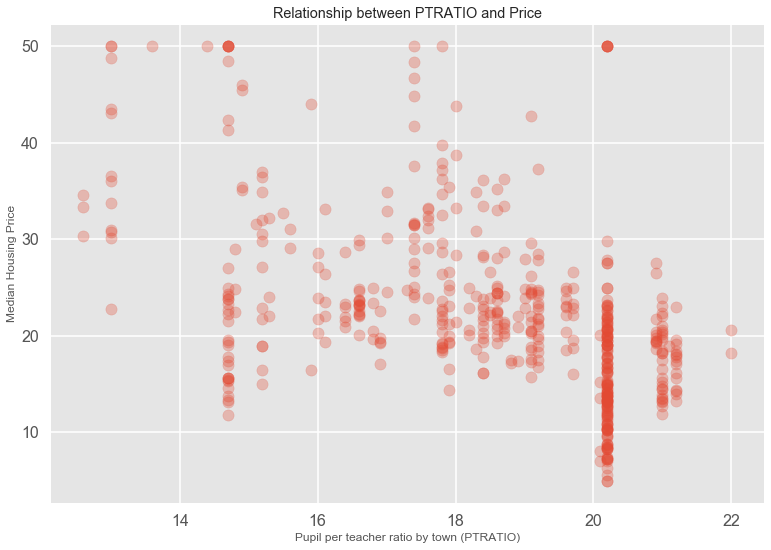

In [17]:
# your turn: scatter plot between *PTRATIO* and *PRICE*
plt.scatter(bos.PTRATIO, bos.PRICE, alpha=.3)
plt.xlabel("Pupil per teacher ratio by town (PTRATIO)")
plt.ylabel("Median Housing Price")
plt.title("Relationship between PTRATIO and Price");

This relationship seems pretty weak as well, as we have data scattered all over the graph. There seems to be a general trend, though, that higher ratio correspond to lower median prices. In particular we observe an unusual high number of towns with a ratio of 20.2. This could be a city, or state, law that limits town to be at or below that level for their schools.

In [18]:
(bos.PTRATIO.value_counts())[:10,]

20.2    140
14.7     34
21.0     27
17.8     23
19.2     19
17.4     18
18.6     17
19.1     17
16.6     16
18.4     16
Name: PTRATIO, dtype: int64

We now go back to what we noticed in the scatter plot of RM versus PRICE, that is: some high priced neighborhood room averages were *outliers*. Let's plot the variables RM and AGE for only these values. 

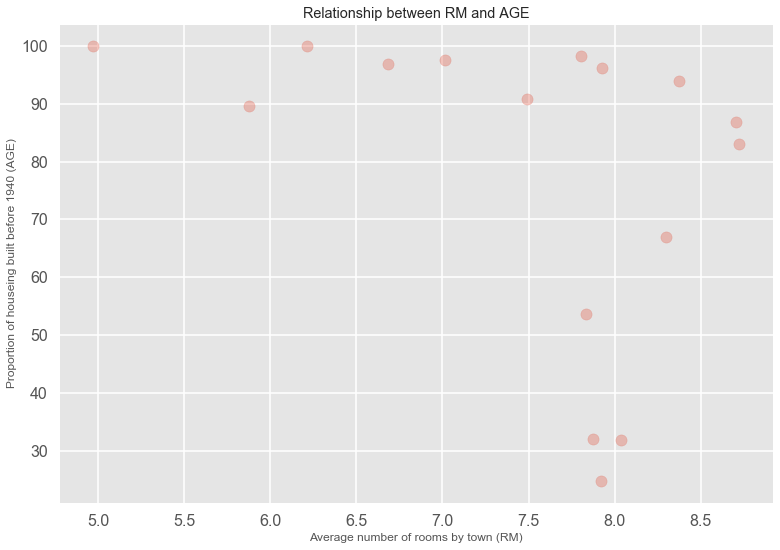

In [19]:
plt.scatter(bos[bos.PRICE==50].RM, bos[bos.PRICE==50].AGE, alpha=.3)
plt.xlabel("Average number of rooms by town (RM)")
plt.ylabel("Proportion of houseing built before 1940 (AGE)")
plt.title("Relationship between RM and AGE");

What we see is that if the average number of rooms is less than 7.5 then the proportion of owner-occupied units built prior to 1940 is at or above 90%. That is: these last towns probably correspond to older, but highly searched neighborhood, and people are willing to downsize to live in them. 

In [20]:
# look at indexes of such towns to compare with outliers later
bos[bos.PRICE==50].index

Int64Index([161, 162, 163, 166, 186, 195, 204, 225, 257, 267, 283, 368, 369,
            370, 371, 372],
           dtype='int64')

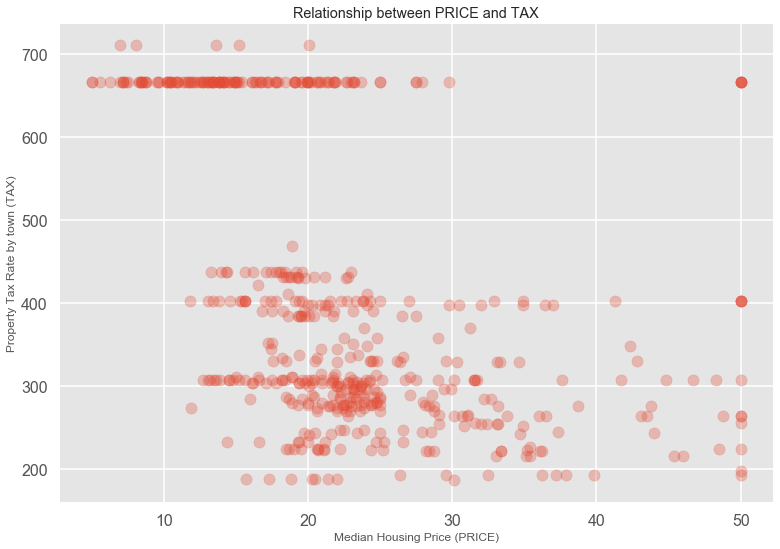

In [21]:
# scatter plot of PRICE and TAX
plt.scatter(bos.PRICE, bos.TAX, alpha=.3)
plt.ylabel("Property Tax Rate by town (TAX)")
plt.xlabel("Median Housing Price (PRICE)")
plt.title("Relationship between PRICE and TAX");

Interestingly, there seem to be a mild negative linear relationship between Housing Price and Tax Rate. That is: as the price of housing increases, the tax rate drops. Mostly we see that high median price towns have smaller property tax rates.

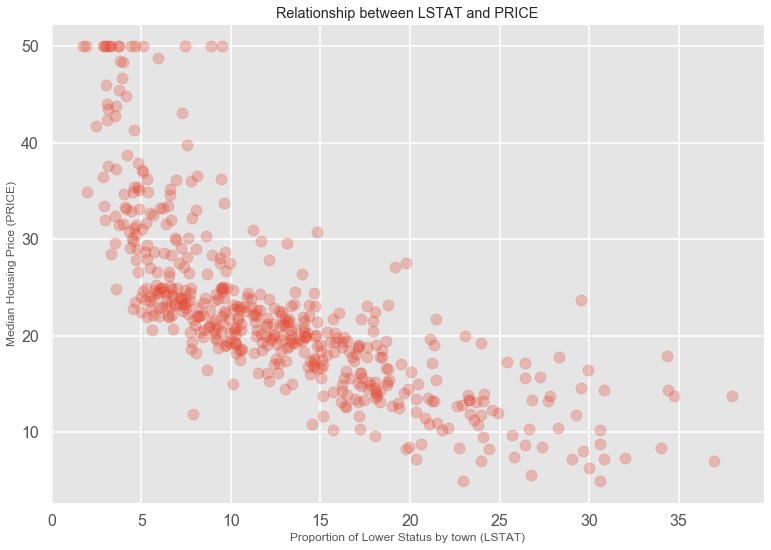

In [22]:
# scatter plot of LSTAT and PRICE
plt.scatter(bos.LSTAT, bos.PRICE, alpha=.3)
plt.xlabel("Proportion of Lower Status by town (LSTAT)")
plt.ylabel("Median Housing Price (PRICE)")
plt.title("Relationship between LSTAT and PRICE");

Again we see that the relationship between these two variables: LSTAT, or the proportion of lower status among the population, and PRICE, the median housing price is more of an exponential one. In particular as the proportion of lower status increases, the median price decreases exponentially. We can see this better when plotting the y-axis on a log scale.

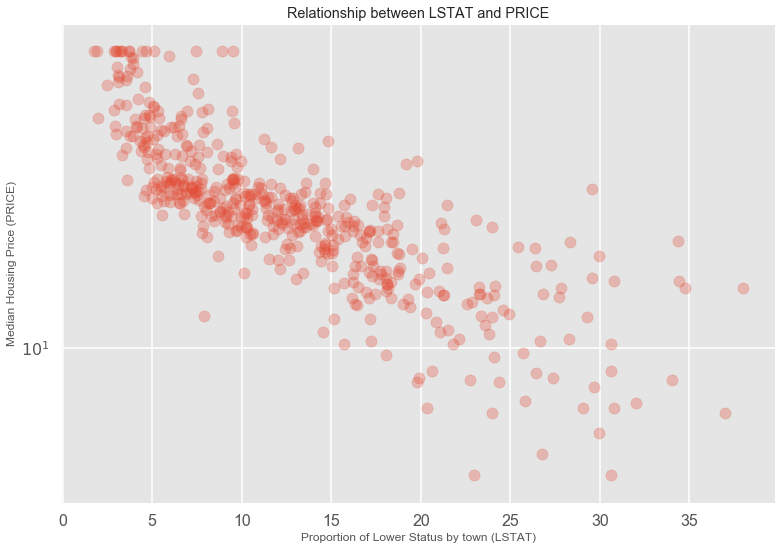

In [23]:
# scatter plot of LSTAT and log(PRICE)
plt.yscale('log')
plt.scatter(bos.LSTAT, bos.PRICE, alpha=.3)
plt.xlabel("Proportion of Lower Status by town (LSTAT)")
plt.ylabel("Median Housing Price (PRICE)")
plt.title("Relationship between LSTAT and PRICE");

### Scatterplots using Seaborn
***

[Seaborn](https://stanford.edu/~mwaskom/software/seaborn/) is a cool Python plotting library built on top of matplotlib. It provides convenient syntax and shortcuts for many common types of plots, along with better-looking defaults.

We can also use [seaborn regplot](https://stanford.edu/~mwaskom/software/seaborn/tutorial/regression.html#functions-to-draw-linear-regression-models) for the scatterplot above. This provides automatic linear regression fits (useful for data exploration later on). Here's one example below.

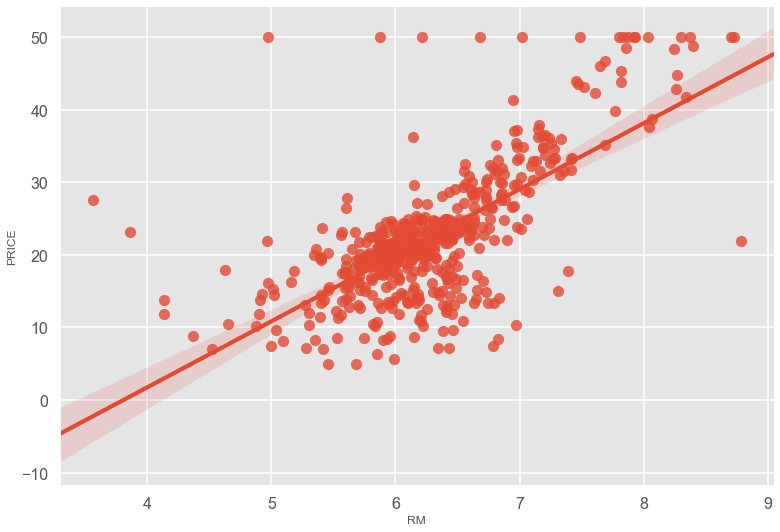

In [24]:
sns.regplot(y="PRICE", x="RM", data=bos, fit_reg = True);

### Histograms
***


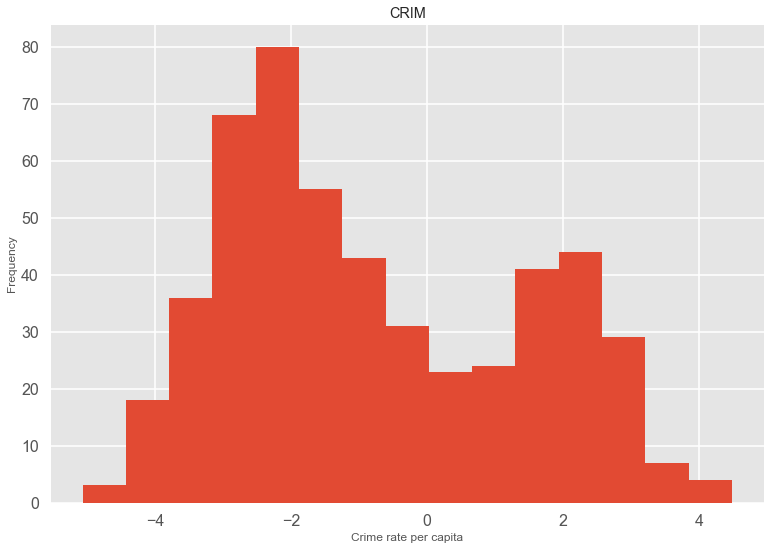

In [25]:
# changed bins number to 15 for better visibility of bimodal distribution
# notice this is a natural log plot rather than a log base 10 plot as above
plt.hist(np.log(bos.CRIM), bins=15)
plt.title("CRIM")
plt.xlabel("Crime rate per capita")
plt.ylabel("Frequency")
plt.show()

<div class="span5 alert alert-info">
<h3>Part 2 Checkup Exercise Set II</h3>

<p><b>Exercise:</b> In the above histogram, we took the logarithm of the crime rate per capita. Repeat this histogram without taking the log. What was the purpose of taking the log? What do we gain by making this transformation? What do you now notice about this variable that is not obvious without making the transformation?

<p><b>Exercise:</b> Plot the histogram for *RM* and *PTRATIO* against each other, along with the two variables you picked in the previous section. We are looking for correlations in predictors here.</p>
</div>

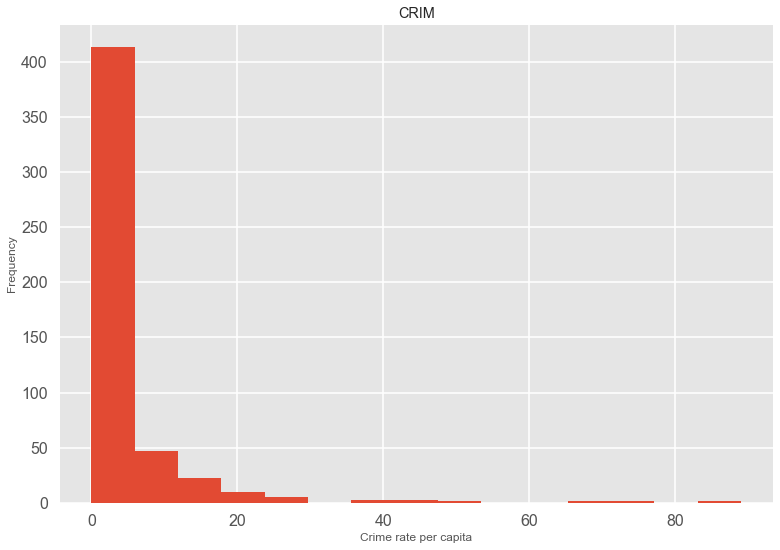

In [26]:
# histogram plot of CRIM
plt.hist(bos.CRIM, bins=15)
plt.title("CRIM")
plt.xlabel("Crime rate per capita")
plt.ylabel("Frequency")
plt.show()

By taking the log of the Crime rate we are better able to distinguish different values of such variable, as most values are very small. Looking at the *log* plot we can see a bimodal distribution for the crime rate, with a first peak around $e^{-2}$, or 0.13 and another around $e^2$, or 7.

We now plot the following scatterplots to identify any high correlation between the following pairs of variables:
*  RM and PTRATIO
*  TAX and LSTAT
*  CRIM and LSTAT
*  RM and AGE

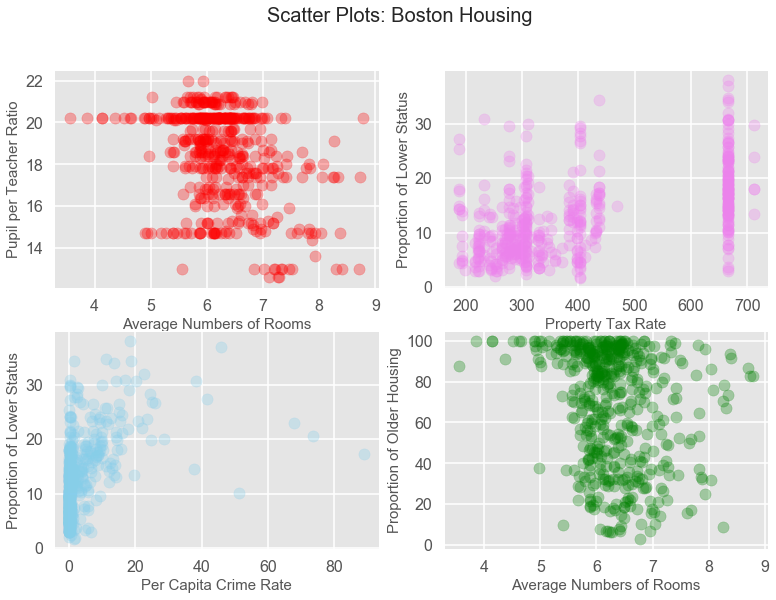

In [27]:
plt.close('all')
# switch plot style to 'ggplot'
plt.style.use('ggplot')

# create 2 x 2 figure with the 4 scatter plots
fig, axes = plt.subplots(2,2)
ax_lst = fig.get_axes()
colors = ['red','violet','skyblue','green']
col_lst = [['RM','PTRATIO'],['TAX','LSTAT'],['CRIM','LSTAT'],['RM','AGE']]

# creating a dict to replace column names with full explanation for labeling axes
full_dict={'RM':'Average Numbers of Rooms', 
          'PTRATIO':'Pupil per Teacher Ratio',
          'TAX':'Property Tax Rate',
          'LSTAT':'Proportion of Lower Status',
          'CRIM':'Per Capita Crime Rate',
          'AGE':'Proportion of Older Housing',
          'DIS':'Distance to 5 Major Employment Centers',
          'NOX':'Nitric Oxides Concentration',
          'RAD':'Accessibility to Radial Highways'}
names = [[full_dict.get(x,x),full_dict.get(y,y)] for x,y in col_lst]

#creating  4 scatterplots 
for ax,cols,color in zip(ax_lst,col_lst,colors):
    ax.scatter(bos[cols[0]], bos[cols[1]], alpha=.3, color=color)

# creating subplots' titles & main title
plt.suptitle('Scatter Plots: Boston Housing', fontsize=20)
for ax,name in zip(ax_lst,names):
    ax.set_xlabel(name[0],fontsize=15)
    ax.set_ylabel(name[1],fontsize=15)

plt.show()

These variables don't seem to be particularly linearly correlated. in some cases, as for the CRIM and LSTAT, some outliers make it more difficult to see such correltions. We take a look at the correlation matrix to find variables that are highly correlated.

In [28]:
bos.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.000000,-0.199458,0.404471,-0.055295,0.417521,-0.219940,0.350784,-0.377904,0.622029,0.579564,0.288250,-0.377365,0.452220,-0.385832
ZN,-0.199458,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.404471,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055295,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.417521,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219940,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.350784,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.377904,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.622029,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.579564,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [29]:
# identifying most positively (and most negatively) correlated variables' pairs
most_pos = [[(bos.corr())[bos.corr() != 1][name].max(),(bos.corr())[bos.corr() != 1][name].argmax(),name] for name in bos.columns]
most_neg = [[(bos.corr())[bos.corr() != 1][name].min(),(bos.corr())[bos.corr() != 1][name].argmin(),name] for name in bos.columns]

In [30]:
# entering above info in a DataFrame, and choosing appropriate column names
most_corr = (pd.DataFrame(most_pos)).join(pd.DataFrame(most_neg), lsuffix='l')
most_corr.columns = ['pos_corr','pos_x','pos_y','neg_corr','neg_x','neg_y']
most_corr

,pos_corr,pos_x,pos_y,neg_corr,neg_x,neg_y
0,0.622029,RAD,CRIM,-0.385832,PRICE,CRIM
1,0.664408,DIS,ZN,-0.569537,AGE,ZN
2,0.763651,NOX,INDUS,-0.708027,DIS,INDUS
3,0.175260,PRICE,CHAS,-0.121515,PTRATIO,CHAS
4,0.763651,INDUS,NOX,-0.769230,DIS,NOX
5,0.695360,PRICE,RM,-0.613808,LSTAT,RM
6,0.731470,NOX,AGE,-0.747881,DIS,AGE
7,0.664408,ZN,DIS,-0.769230,NOX,DIS
8,0.910228,TAX,RAD,-0.494588,DIS,RAD
9,0.910228,RAD,TAX,-0.534432,DIS,TAX


As can we see from the above table the greatest correlation is between TAX and RAD, that is: proerty tax rate and accessibility to radial highways. The next one is between NOX and DIS, or nitric oxides concentration and distance to major employment centers. This last one is strongly negative, that is: oxides concentration increases as the distance to the major employment centers decreases. The associated scatterplots are below.

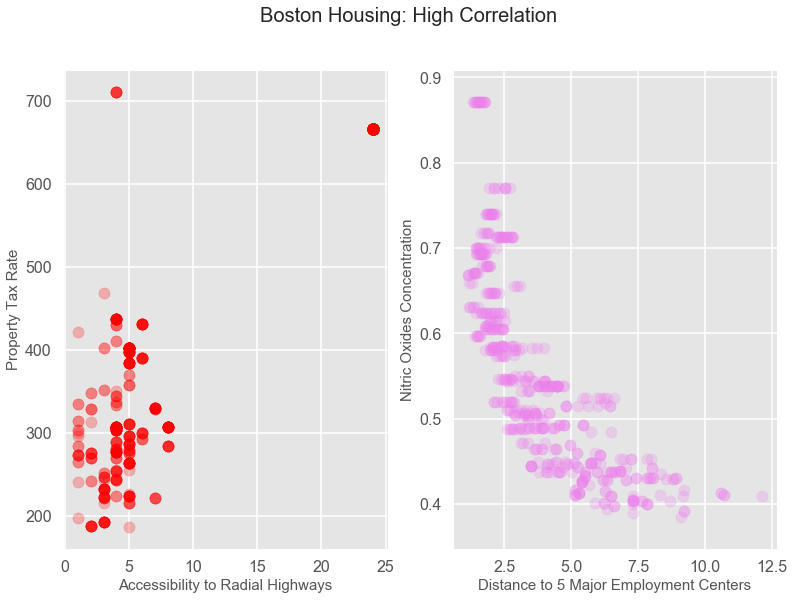

In [31]:
# SCATTERPLOT OF MOST CORRELATED VARIABLES
fig, axes = plt.subplots(1,2)
ax_lst = fig.get_axes()
colors = ['red','violet']
new_lst = [['RAD','TAX'],['DIS','NOX']]


# using dict defined earlier to create list with full names
names = [[full_dict.get(x,x),full_dict.get(y,y)] for x,y in new_lst]

#creating scatterplots 
for ax,cols,color in zip(ax_lst,new_lst,colors):
    ax.scatter(bos[cols[0]], bos[cols[1]], alpha=.25, color=color)

# creating subplots titles & main title
plt.suptitle('Boston Housing: High Correlation', fontsize=20)
for ax,name in zip(ax_lst,names):
    ax.set_xlabel(name[0],fontsize=15)
    ax.set_ylabel(name[1],fontsize=15)

plt.show()

It looks like the value of the correlation between TAX and RAD is artificially high due to the presence of a group of data values with TAX = 666 and RAD = 24. These 132 identical pair of values force the least squares line to pass through them, as can be seen in the following scatterplot, thus artificially increasing the correlation of the two variables.

The value of the correlation when the towns corresponding to these two values are dropped is actually much lower: 0.188, a low positive correlation. This can be inferred when looking at the botoom left of the following scatterplot as those values do not seem to lie mostly along a line. The following code verifies this.

RAD value counts for towns with TAX = 666:
 24.0    132
Name: RAD, dtype: int64

Correlation value for TAX and RAD for towns where TAX != 666: 0.188256185257


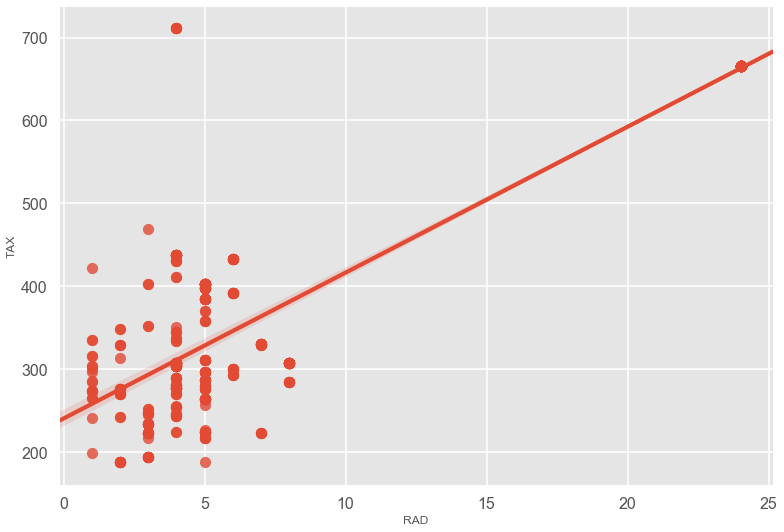

In [32]:
# subsetting on TAX=666 and checking that all such value share a RAD value of 24
print('RAD value counts for towns with TAX = 666:\n', bos[bos.TAX == 666]['RAD'].value_counts())

# creating DataFrame for all other towns whose TAX != 666
bos666 = bos[bos['TAX'] != 666]
print('\nCorrelation value for TAX and RAD for towns where TAX != 666:', bos666['TAX'].corr(bos666['RAD']))
sns.regplot(y='TAX', x='RAD', data=bos, fit_reg=True);

## Part 3: Linear Regression with Boston Housing Data Example
***

Here, 

$Y$ = boston housing prices (called "target" data in python, and referred to as the dependent variable or response variable)

and

$X$ = all the other features (or independent variables, predictors or explanatory variables)

which we will use to fit a linear regression model and predict Boston housing prices. We will use the least-squares method to estimate the coefficients.  

We'll use two ways of fitting a linear regression. We recommend the first but the second is also powerful in its features.

### Fitting Linear Regression using `statsmodels`
***
[Statsmodels](http://statsmodels.sourceforge.net/) is a great Python library for a lot of basic and inferential statistics. It also provides basic regression functions using an R-like syntax, so it's commonly used by statisticians. While we don't cover statsmodels officially in the Data Science Intensive workshop, it's a good library to have in your toolbox. Here's a quick example of what you could do with it. The version of least-squares we will use in statsmodels is called *ordinary least-squares (OLS)*. There are many other versions of least-squares such as [partial least squares (PLS)](https://en.wikipedia.org/wiki/Partial_least_squares_regression) and [weighted least squares (WLS)](https://en.wikipedia.org/wiki/Iteratively_reweighted_least_squares).

In [33]:
# Import regression modules
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [34]:
# statsmodels works nicely with pandas dataframes
# The thing inside the "quotes" is called a formula, a bit on that below
m = ols('PRICE ~ RM',bos).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Wed, 27 Sep 2017   Prob (F-statistic):           2.49e-74
Time:                        18:01:36   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    -34.6706      2.650    -13.084      0.0

#### Interpreting coefficients

There is a ton of information in this output. But we'll concentrate on the coefficient table (middle table). We can interpret the `RM` coefficient (9.1021) by first noticing that the p-value (under `P>|t|`) is so small, basically zero. This means that the number of rooms, `RM`, is a statisticall significant predictor of `PRICE`. The regression coefficient for `RM` of 9.1021 means that *on average, each additional room is associated with an increase of $\$9,100$ in house price net of the other variables*. The confidence interval gives us a range of plausible values for this average change, about ($\$8,279, \$9,925$), definitely not chump change. 

In general, the $\hat{\beta_i}, i > 0$ can be interpreted as the following: "A one unit increase in $x_i$ is associated with, on average, a $\hat{\beta_i}$ increase/decrease in $y$ net of all other variables."

On the other hand, the interpretation for the intercept, $\hat{\beta}_0$ is the average of $y$ given that all of the independent variables $x_i$ are 0.

####  `statsmodels` formulas
***
This formula notation will seem familiar to `R` users, but will take some getting used to for people coming from other languages or are new to statistics.

The formula gives instruction for a general structure for a regression call. For `statsmodels` (`ols` or `logit`) calls you need to have a Pandas dataframe with column names that you will add to your formula. In the below example you need a pandas data frame that includes the columns named (`Outcome`, `X1`,`X2`, ...), but you don't need to build a new dataframe for every regression. Use the same dataframe with all these things in it. The structure is very simple:

`Outcome ~ X1`

But of course we want to to be able to handle more complex models, for example multiple regression is doone like this:

`Outcome ~ X1 + X2 + X3`

In general, a formula for an OLS multiple linear regression is

`Y ~ X1 + X2 + ... + Xp`

This is the very basic structure but it should be enough to get you through the homework. Things can get much more complex. You can force statsmodels to treat variables as categorical with the `C()` function, call numpy functions to transform data such as `np.log` for extremely-skewed data, or fit a model without an intercept by including `- 1` in the formula. For a quick run-down of further uses see the `statsmodels` [help page](http://statsmodels.sourceforge.net/devel/example_formulas.html).


Let's see how our model actually fit our data. We can see below that there is a ceiling effect, we should probably look into that. Also, for large values of $Y$ we get underpredictions, most predictions are below the 45-degree gridlines. 

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set I</h3>

<p><b>Exercise:</b> Create a scatterplot between the predicted prices, available in `m.fittedvalues` (where `m` is the fitted model) and the original prices. How does the plot look? Do you notice anything interesting or weird in the plot? Comment on what you see.</p>
</div>

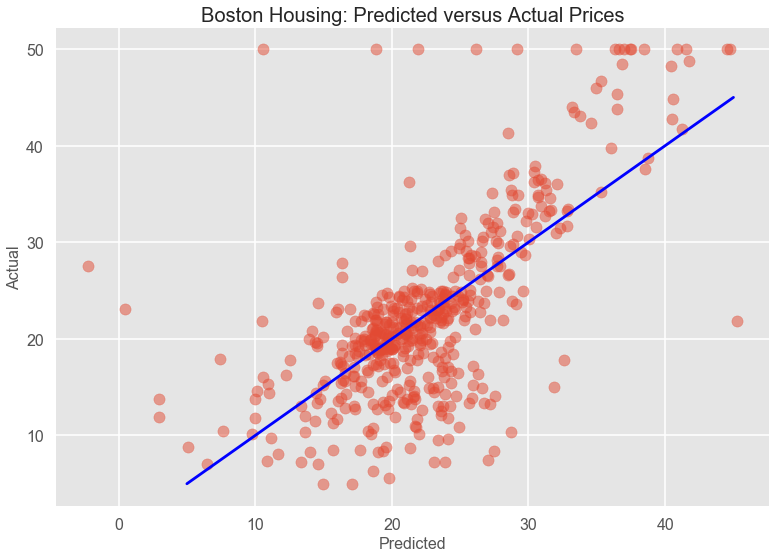

In [35]:
# scatter plot of predicted prices and actual prices
plt.scatter(m.fittedvalues, bos.PRICE, alpha=.5)
plt.plot([5,45],[5,45], color='blue')  # Adding a 'perfect prediction' line
plt.xlabel('Predicted', fontsize=16)
plt.ylabel('Actual', fontsize=16)
plt.title('Boston Housing: Predicted versus Actual Prices', fontsize=20)
plt.show();

The above scatter plot shows the *perfect perdiction* line, in blue. Any point above the line represents an underestimate, as the actual value is higher than the predicted value, while any point below is an overestimate. 

We can see that the model based only on the average number of rooms does a poor job of predicting median prices especially with low and high valued towns. Almost every town whose actual median is above 30 is underestimated, while most of the towns with median value below 15 are overestimated. This is bound to happen as the average number of rooms does not explain by itself the entire variation in prices as the cost of a house is not tied solely to the number of its rooms but also to other features of the rooms, such as size or quality. A model that only uses average number of rooms will therefore incorrectly predict prices for the *best* and *worst* towns especially.

### Fitting Linear Regression using `sklearn`


In [36]:
from sklearn.linear_model import LinearRegression
X = bos.drop('PRICE', axis = 1)

# This creates a LinearRegression object
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

#### What can you do with a LinearRegression object? 
***
Check out the scikit-learn [docs here](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). We have listed the main functions here. Most machine learning models in scikit-learn follow this same API of fitting a model with `fit`, making predictions with `predict` and the appropriate scoring function `score` for each model.

Main functions | Description
--- | --- 
`lm.fit()` | Fit a linear model
`lm.predit()` | Predict Y using the linear model with estimated coefficients
`lm.score()` | Returns the coefficient of determination (R^2). *A measure of how well observed outcomes are replicated by the model, as the proportion of total variation of outcomes explained by the model*

#### What output can you get?

In [37]:
# Look inside lm object
# lm.<tab>

Output | Description
--- | --- 
`lm.coef_` | Estimated coefficients
`lm.intercept_` | Estimated intercept 

### Fit a linear model
***

The `lm.fit()` function estimates the coefficients the linear regression using least squares. 

In [38]:
# Use all 13 predictors to fit linear regression model
lm.fit(X, bos.PRICE)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set II</h3>

<p><b>Exercise:</b> How would you change the model to not fit an intercept term? Would you recommend not having an intercept? Why or why not? For more information on why to include or exclude an intercept, look [here](https://online.stat.psu.edu/~ajw13/stat501/SpecialTopics/Reg_thru_origin.pdf).</p>

<p><b>Exercise:</b> One of the assumptions of the linear model is that the residuals must be i.i.d. (independently and identically distributed). To satisfy this, is it enough that the residuals are normally distributed? Explain your answer.</p>

<p><b>Exercise:</b> True or false. To use linear regression, $Y$ must be normally distributed. Explain your answer.</p>
</div>


1. Changing fit_intercept to False would not fit an intercept term, thus forcing the regression line through the origin. This is not recommended here, as some values of 0 do not indicate the absence of a house (town), as for example TAX=0, which could simply indicate a town with no property tax.

2. It is not enough that the residuals are normally distributed, they need to have the same normal distribution and such distributions must be independent of each other.

3. False. Y does not need to be normally distributed to use Linear Regression. What should be true instead is that Y depends linearly on X, and that the residuals are normally distributed with a mean of 0. 


### Estimated intercept and coefficients

Let's look at the estimated coefficients from the linear model using `lm.intercept_` and `lm.coef_`.  

After we have fit our linear regression model using the least squares method, we want to see what are the estimates of our coefficients $\beta_0$, $\beta_1$, ..., $\beta_{13}$: 

$$ \hat{\beta}_0, \hat{\beta}_1, \ldots, \hat{\beta}_{13} $$



In [39]:
print('Estimated intercept coefficient: {}'.format(lm.intercept_))

Estimated intercept coefficient: 36.491103280363404


In [40]:
print('Number of coefficients: {}'.format(len(lm.coef_)))

Number of coefficients: 13


In [41]:
# The coefficients
pd.DataFrame({'features': X.columns, 'estimatedCoefficients': lm.coef_})[['features', 'estimatedCoefficients']]

,features,estimatedCoefficients
0,CRIM,-0.107171
1,ZN,0.046395
2,INDUS,0.020860
3,CHAS,2.688561
4,NOX,-17.795759
5,RM,3.804752
6,AGE,0.000751
7,DIS,-1.475759
8,RAD,0.305655
9,TAX,-0.012329


### Predict Prices 

We can calculate the predicted prices ($\hat{Y}_i$) using `lm.predict`. 

$$ \hat{Y}_i = \hat{\beta}_0 + \hat{\beta}_1 X_1 + \ldots \hat{\beta}_{13} X_{13} $$

In [42]:
# first five predicted prices
lm.predict(X)[0:5]

array([ 30.00821269,  25.0298606 ,  30.5702317 ,  28.60814055,  27.94288232])

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set III</h3>

<p><b>Exercise:</b> Histogram: Plot a histogram of all the predicted prices. Write a story about what you see. Describe the shape, center and spread of the distribution. Are there any outliers? What might be the reason for them? Should we do anything special with them?</p>

<p><b>Exercise:</b> Scatterplot: Let's plot the true prices compared to the predicted prices to see they disagree (we did this with `statsmodels` before).</p>

<p><b>Exercise:</b> We have looked at fitting a linear model in both `statsmodels` and `scikit-learn`. What are the advantages and disadvantages of each based on your exploration? Based on the information provided by both packages, what advantage does `statsmodels` provide?</p>
</div>

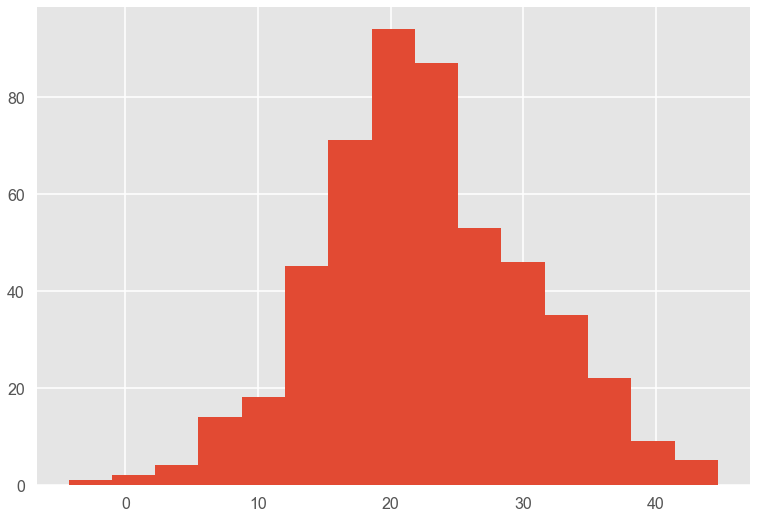

In [43]:
# histogram plot of predicted prices
plt.hist(lm.predict(X), bins=15)
plt.show();

In [44]:
pd.DataFrame(lm.predict(X)).describe()

,0
count,506.000000
mean,22.532806
std,7.914896
min,-4.283009
25%,17.447270
50%,22.120625
75%,27.412587
max,44.673399


From the histogram we can see that the distribution of prices is not really normal, as the histogram does not look like a bell curve. The mean is roughly 22.5 with a standard deviation of about 8. There are some negative values in the prediction which obviously do not make much sense, and also the maximum value is 44.67, while there are several towns with higher values than that.

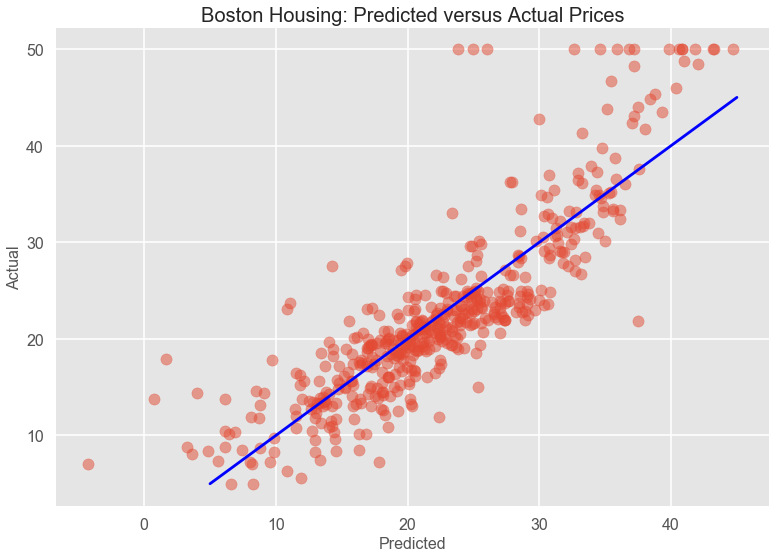

In [45]:
# scatter plot of predicted prices and actual prices
plt.scatter(lm.predict(X), bos.PRICE, alpha=.5)
plt.plot([5,45],[5,45], color='blue')  # Adding a 'perfect prediction' line
plt.xlabel('Predicted', fontsize=16)
plt.ylabel('Actual', fontsize=16)
plt.title('Boston Housing: Predicted versus Actual Prices', fontsize=20)
plt.show();

The full model does definitely a better job of predicting that the previous one based only on the average number of rooms, as the points lie closer to the *perfect prediction* line, except for some of the towns whose median prices were capped at 50.

One advantage of statsmodel versus scikit-learn is that with the summary method is easy to get a full picture of a lot of statistics related to the linear regression model. One disadvantage is that it does not automatically add a constant to the model unless the input is entered using a formula, as we did above. Scikit-learn seems to be more geared towrds using such model for predictions rather than displaying statistical results as for statsmodels.  

### Evaluating the Model: Sum-of-Squares

The partitioning of the sum-of-squares shows the variance in the predictions explained by the model and the variance that is attributed to error.

$$TSS = ESS + RSS$$

#### Residual Sum-of-Squares (aka $RSS$)

The residual sum-of-squares is one of the basic ways of quantifying how much error exists in the fitted model. We will revisit this in a bit.

$$ RSS = \sum_{i=1}^N r_i^2 = \sum_{i=1}^N \left(y_i - \left(\beta_0 + \beta_1 x_i\right)\right)^2 $$

In [46]:
print(np.sum((bos.PRICE - lm.predict(X)) ** 2))

11080.276284149868


#### Explained Sum-of-Squares (aka $ESS$)

The explained sum-of-squares measures the variance explained by the regression model.

$$ESS = \sum_{i=1}^N \left( \hat{y}_i - \bar{y} \right)^2 = \sum_{i=1}^N \left( \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) - \bar{y} \right)^2$$

In [47]:
print(np.sum((lm.predict(X) - np.mean(bos.PRICE)) ** 2))

31636.0191309


### Evaluating the Model: The Coefficient of Determination ($R^2$)

The coefficient of determination, $R^2$, tells us the percentage of the variance in the response variable $Y$ that can be explained by the linear regression model.

$$ R^2 = \frac{ESS}{TSS} $$

The $R^2$ value is one of the most common metrics that people use in describing the quality of a model, but it is important to note that *$R^2$ increases artificially as a side-effect of increasing the number of independent variables.* While $R^2$ is reported in almost all statistical packages, another metric called the *adjusted $R^2$* is also provided as it takes into account the number of variables in the model, and can sometimes even be used for non-linear regression models!

$$R_{adj}^2 = 1 - \left( 1 - R^2 \right) \frac{N - 1}{N - K - 1} = R^2 - \left( 1 - R^2 \right) \frac{K}{N - K - 1} = 1 - \frac{\frac{RSS}{DF_R}}{\frac{TSS}{DF_T}}$$

where $N$ is the number of observations, $K$ is the number of variables, $DF_R = N - K - 1$ is the degrees of freedom associated with the residual error and $DF_T = N - 1$ is the degrees of the freedom of the total error.

### Evaluating the Model: Mean Squared Error and the $F$-Statistic
***
The mean squared errors are just the *averages* of the sum-of-squares errors over their respective degrees of freedom.

$$MSE = \frac{ESS}{K}$$
$$MSR = \frac{RSS}{N-K-1}$$

**Remember: ** Notation may vary across resources particularly the use of *R* and *E* in *RSS/ESS* and *MSR/MSE*. In some resources, E = explained and R = residual. In other resources, E = error and R = regression (explained). **This is a very important distinction that requires looking at the formula to determine which naming scheme is being used.**

Given the MSR and MSE, we can now determine whether or not the entire model we just fit is even statistically significant. We use an $F$-test for this. The null hypothesis is that all of the $\beta$ coefficients are zero, that is, none of them have any effect on $Y$. The alternative is that *at least one* $\beta$ coefficient is nonzero, but it doesn't tell us which one in a multiple regression:

$$H_0: \beta_i = 0, \mbox{for all $i$} \\
H_A: \beta_i > 0, \mbox{for some $i$}$$ 

$$F = \frac{MSR}{MSE} = \left( \frac{R^2}{1 - R^2} \right) \left( \frac{N - K - 1}{K} \right)$$
 
Once we compute the $F$-statistic, we can use the $F$-distribution with $N-K$ and $K-1$ degrees of degrees of freedom to get a p-value.

**Warning!** The $F$-statistic mentioned in this section is NOT the same as the F1-measure or F1-value discused in Unit 7.

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set IV</h3>

<p>Let's look at the relationship between `PTRATIO` and housing price.</p>

<p><b>Exercise:</b> Try fitting a linear regression model using only the 'PTRATIO' (pupil-teacher ratio by town) and interpret the intercept and the coefficients.</p>

<p><b>Exercise:</b> Calculate (or extract) the $R^2$ value. What does it tell you?</p>

<p><b>Exercise:</b> Compute the $F$-statistic. What does it tell you?</p>

<p><b>Exercise:</b> Take a close look at the $F$-statistic and the $t$-statistic for the regression coefficient. What relationship do you notice? Note that this relationship only applies in *simple* linear regression models.</p>
</div>

In [48]:
# creating a linear regression model for PRICE explained only by PTRATIO
model = ols('PRICE ~ PTRATIO', data=bos).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.258
Model:                            OLS   Adj. R-squared:                  0.256
Method:                 Least Squares   F-statistic:                     175.1
Date:                Wed, 27 Sep 2017   Prob (F-statistic):           1.61e-34
Time:                        18:01:38   Log-Likelihood:                -1764.8
No. Observations:                 506   AIC:                             3534.
Df Residuals:                     504   BIC:                             3542.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     62.3446      3.029     20.581      0.000        56.393    68.296
PTRATIO       -2.1572      0.163    -13.233      0.000        -2.477    -1.837
==============================================================================
Omnibus:                       92.924   Durbin-Watson:                   0.725
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              191.444
Skew:                           1.001   Prob(JB):                     2.68e-42
Kurtosis:                       5.252   Cond. No.                         160.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

1. For the linear regression model above the intercept is 62.3 and the slope is -2.157. The intercept in this case is meaningless, as it would imply that for a town with a pupil per teacher ratio of 0, the median price of a house would be \$62,340. The slope, or the value of the PTRATIO coefficient instead indicates that for any additional pupil per teacher the median house price goes down by \$2,157.

2. From the above summary we have an R-squared value of .258, that is: only a fourth of the total variation in median house prices is explained by using PTRATIO as a predictor. The remaining three fourths would be not explained, what this is really saying is that using PTRATIO alone is not a very good way of predicting median house prices.

3. The F-statistic here is very high at 175, which corresponds to a p-value of basically 0. It is basically impossible to obtain these values just by random occurences, and therefore our results are statistically significant, although they are not entirely practically significant, due to the low $R^2$ value.

4. $t^2$ the square of the $t$ value for PTRATIO is equal to the $F$ value.

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set V</h3>

<p>Fit a linear regression model using three independent variables</p>

<ol>
<li> 'CRIM' (per capita crime rate by town)
<li> 'RM' (average number of rooms per dwelling)
<li> 'PTRATIO' (pupil-teacher ratio by town)
</ol>

<p><b>Exercise:</b> Compute or extract the $F$-statistic. What does it tell you about the model?</p>

<p><b>Exercise:</b> Compute or extract the $R^2$ statistic. What does it tell you about the model?</p>

<p><b>Exercise:</b> Which variables in the model are significant in predicting house price? Write a story that interprets the coefficients.</p>
</div>

In [49]:
# creating a linear regression model for PRICE explained by CRIM, RM, and PTRATIO
model3 = ols('PRICE ~ CRIM + RM + PTRATIO', data=bos).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.593
Model:                            OLS   Adj. R-squared:                  0.591
Method:                 Least Squares   F-statistic:                     244.2
Date:                Wed, 27 Sep 2017   Prob (F-statistic):           1.09e-97
Time:                        18:01:38   Log-Likelihood:                -1612.6
No. Observations:                 506   AIC:                             3233.
Df Residuals:                     502   BIC:                             3250.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -3.3066      4.038     -0.819      0.413       -11.240     4.627
CRIM          -0.2021      0.032     -6.301      0.000        -0.265    -0.139
RM             7.3816      0.402     18.360      0.000         6.592     8.171
PTRATIO       -1.0742      0.133     -8.081      0.000        -1.335    -0.813
==============================================================================
Omnibus:                      233.249   Durbin-Watson:                   0.828
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2002.374
Skew:                           1.802   Prob(JB):                         0.00
Kurtosis:                      12.054   Cond. No.                         311.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

1. The F-statistics is 244, with a corresonding p-value of effectively 0, telling us that our results are significant.

2. The $R^2$ value is .593, that is: almost 60% of the variation in PRICE is explained using these three variables as predictors. While we expected the $R^2$ value to increase, simply because more variables are used, here the increase is significant, and not simply due to having used three rather than one variable to predict prices.

3. The values of the coefficients are 7.4 for the average number of rooms (RM), -1.1 for the pupil per teacher ratio (PTRATIO), and -0.2 for the per capita crime rate (CRIM). These mean that for every extra room in the average house the price will increase by \$7,382, for every extra pupil in the pupil per teacher ratio the median house price will decrease by \$1,074, and finally for an increase of 1 in the crime rate the median house price will decrease by \$202. It also tells us that the CRIM variable does not have much predictive power, as the 75th percentile value for that variable is 3.64. This implies that 75% of all values would lie in a range of \$202 x 3.64 = \$735. On the other hand, RM has a lot more predictive power.



## Part 4: Comparing Models

During modeling, there will be times when we want to compare models to see which one is more predictive or fits the data better. There are many ways to compare models, but we will focus on two.

### The $F$-Statistic Revisited

The $F$-statistic can also be used to compare two *nested* models, that is, two models trained on the same dataset where one of the models contains a *subset* of the variables of the other model. The *full* model contains $K$ variables and the *reduced* model contains a subset of these $K$ variables. This allows us to add additional variables to a base model and then test if adding the variables helped the model fit.

$$F = \frac{\left( \frac{RSS_{reduced} - RSS_{full}}{DF_{reduced} - DF_{full}} \right)}{\left( \frac{RSS_{full}}{DF_{full}} \right)}$$

where $DF_x = N - K_x - 1$ where $K_x$ is the number of variables in model $x$.

### Akaike Information Criterion (AIC)

Another statistic for comparing two models is AIC, which is based on the likelihood function and takes into account the number of variables in the model.

$$AIC = 2 K - 2 \log_e{L}$$

where $L$ is the likelihood of the model. AIC is meaningless in the absolute sense, and is only meaningful when compared to AIC values from other models. Lower values of AIC indicate better fitting models.

`statsmodels` provides the AIC in its output.

<div class="span5 alert alert-info">
<h3>Part 4 Checkup Exercises</h3>

<p><b>Exercise:</b> Find another variable (or two) to add to the model we built in Part 3. Compute the $F$-test comparing the two models as well as the AIC. Which model is better?</p>
</div>

In [50]:
# adding two extra variables to linear regression predictor
model5 = ols('PRICE ~ CRIM + RM + PTRATIO + np.log(LSTAT) + AGE', data=bos).fit()
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                     299.1
Date:                Wed, 27 Sep 2017   Prob (F-statistic):          1.04e-147
Time:                        18:01:38   Log-Likelihood:                -1490.1
No. Observations:                 506   AIC:                             2992.
Df Residuals:                     500   BIC:                             3018.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
Intercept        39.3803      3.998      9.849      0.000        31.525    47.236
CRIM             -0.0881      0.027     -3.305      0.001        -0.141    -0.036
RM                2.7939      0.411      6.794      0.000         1.986     3.602
PTRATIO          -0.7302      0.107     -6.844      0.000        -0.940    -0.521
np.log(LSTAT)   -10.0966      0.600    -16.820      0.000       -11.276    -8.917
AGE               0.0485      0.010      5.016      0.000         0.030     0.068
==============================================================================
Omnibus:                      166.527   Durbin-Watson:                   1.018
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              761.116
Skew:                           1.396   Prob(JB):                    5.32e-166
Kurtosis:                       8.320   Cond. No.                     1.50e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.5e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [51]:
# models to compare [reduced,full]
models = [model3,model5]

# computing F-statistics from sum of squares
RSS_red = ((bos.PRICE - models[0].fittedvalues)**2).sum()
RSS_full = ((bos.PRICE - models[1].fittedvalues)**2).sum()
F_stat = ((RSS_red - RSS_full)/(models[0].df_resid - models[1].df_resid))/(RSS_full/models[1].df_resid)
print('Computed from scratch: \nF-statistic =', F_stat)

# using the compare_f_test function from statsmodel
print('\nComputed with statsmodels:\n(F-statistics, p-value, models dof difference) =', model5.compare_f_test(model3))

Computed from scratch: 
F-statistic = 155.679006145

Computed with statsmodels:
(F-statistics, p-value, models dof difference) = (155.6790061445372, 2.7502284638718437e-53, 2.0)


Adding these two extra predictor variables has definitely helped in making our regression fit better the data. The F-statistic is very high: 155.7! In addition, we can see that the $R^2$ value has increased from .59 to .75, thus the new model does a better job of explaining the variation in the data. Finally, another indicator of a significant improvement in the model is that the AIC number has decreased from 3233 to 2992!


## Part 5: Evaluating the Model via Model Assumptions and Other Issues
***
Linear regression makes several assumptions. It is always best to check that these assumptions are valid after fitting a linear regression model.

<div class="span5 alert alert-danger">
<ul>
  <li>**Linearity**. The dependent variable $Y$ is a linear combination of the regression coefficients and the independent variables $X$. This can be verified with a scatterplot of each $X$ vs. $Y$ and plotting correlations among $X$. Nonlinearity can sometimes be resolved by [transforming](https://onlinecourses.science.psu.edu/stat501/node/318) one or more independent variables, the dependent variable, or both. In other cases, a [generalized linear model](https://en.wikipedia.org/wiki/Generalized_linear_model) or a [nonlinear model](https://en.wikipedia.org/wiki/Nonlinear_regression) may be warranted.</li>
  <li>**Constant standard deviation**. The SD of the dependent variable $Y$ should be constant for different values of X. We can check this by plotting each $X$ against $Y$ and verifying that there is no "funnel" shape showing data points fanning out as $X$ increases or decreases. Some techniques for dealing with non-constant variance include weighted least squares (WLS), [robust standard errors](https://en.wikipedia.org/wiki/Heteroscedasticity-consistent_standard_errors), or variance stabilizing transformations.
    </li>
  <li> **Normal distribution for errors**.  The $\epsilon$ term we discussed at the beginning are assumed to be normally distributed. This can be verified with a fitted values vs. residuals plot and verifying that there is no pattern, and with a quantile plot.
  $$ \epsilon_i \sim N(0, \sigma^2)$$
Sometimes the distributions of responses $Y$ may not be normally distributed at any given value of $X$.  e.g. skewed positively or negatively. </li>
<li> **Independent errors**.  The observations are assumed to be obtained independently.
    <ul>
        <li>e.g. Observations across time may be correlated
    </ul>
</li>
</ul>  

</div>

There are some other issues that are important investigate with linear regression models.

<div class="span5 alert alert-danger">
<ul>
  <li>**Correlated Predictors:** Care should be taken to make sure that the independent variables in a regression model are not too highly correlated. Correlated predictors typically do not majorly affect prediction, but do inflate standard errors of coefficients making interpretation unreliable. Common solutions are dropping the least important variables involved in the correlations, using regularlization, or, when many predictors are highly correlated, considering a dimension reduction technique such as principal component analysis (PCA).
  <li>**Influential Points:** Data points that have undue influence on the regression model. These points can be high leverage points or outliers. Such points are typically removed and the regression model rerun.
</ul>
</div>


<div class="span5 alert alert-info">
<h3>Part 5 Checkup Exercises</h3>

<p>Take the reduced model from Part 3 to answer the following exercises. Take a look at [this blog post](http://mpastell.com/2013/04/19/python_regression/) for more information on using statsmodels to construct these plots.</p>
    
<p><b>Exercise:</b> Construct a fitted values versus residuals plot. What does the plot tell you? Are there any violations of the model assumptions?</p>

<p><b>Exercise:</b> Construct a quantile plot of the residuals. What does the plot tell you?</p>

<p><b>Exercise:</b> What are some advantages and disadvantages of the fitted vs. residual and quantile plot compared to each other?</p>

<p><b>Exercise:</b> Identify any outliers (if any) in your model and write a story describing what these outliers might represent.</p>

<p><b>Exercise:</b> Construct a leverage plot and identify high leverage points in the model. Write a story explaining possible reasons for the high leverage points.</p>

<p><b>Exercise:</b> Remove the outliers and high leverage points from your model and run the regression again. How do the results change?</p>
</div>

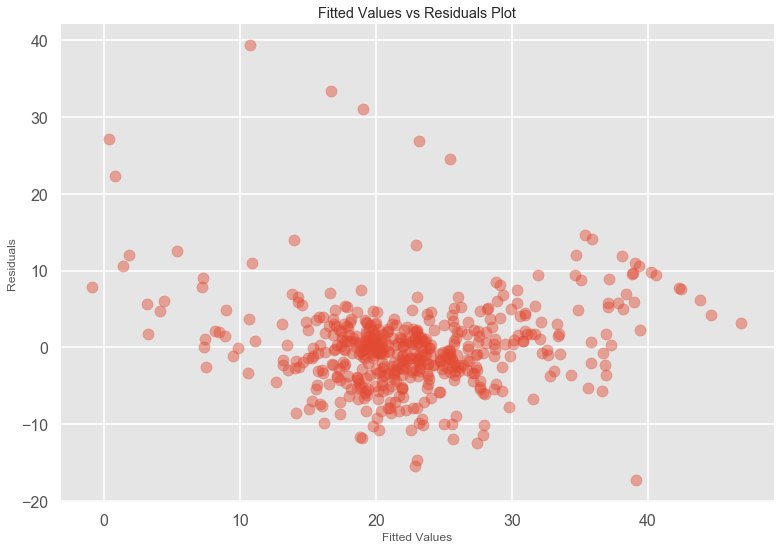

In [52]:
# Fitted values vs Residuals plot
plt.scatter(model3.fittedvalues, model3.resid,  alpha=.45)
plt.ylabel('Residuals')
plt.xlabel('Fitted Values')
plt.title('Fitted Values vs Residuals Plot');

*  **The residuals seem *not* to be randomly placed around 0.** This suggests that assuming a linear relationship might not be reasonable.

*  **The residuals do not form a horizontal band around 0** Residuals seem to follow the pattern mentioned above, therefore they are mostly positive for low and high fitted values, while they are mostly negative for middle-of-the-pack values. If we imagined a band following the generated pattern of the residuals we would see that the width of such a band is roughly the same. That is: if we would fit to the (not linear) pattern, the assumption that the errors are equally normally distributed would not be violated. In our case, though, the assumption is violated even if mostly due to the linear assumption of the model. 

* **There are outliers present** We can clearly identify some outliers in the above graph. For example; the points forming almost a line in the top part of the plot, or the point at roughly (38,-17). These residuals seem to not fit the *pattern* of the other residuals.

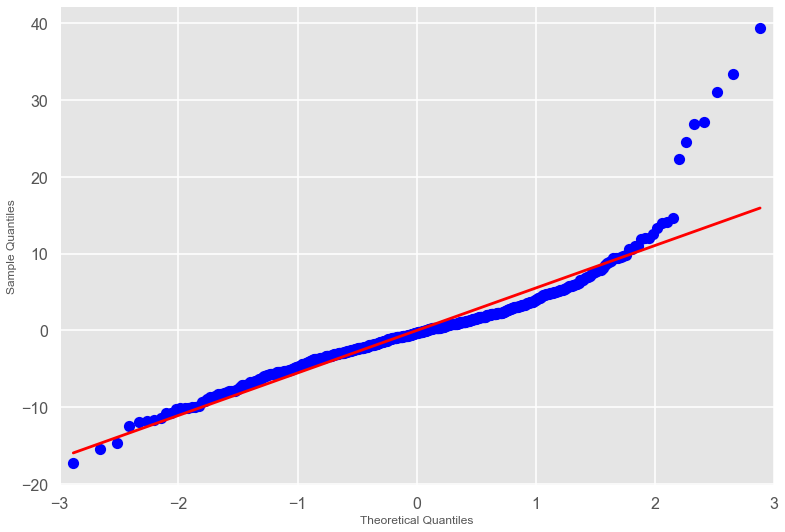

In [53]:
# quantile plot of residuals using statsmodels plot
from statsmodels.graphics.gofplots import *

# calling plot directly will generate two plots
# with figure call only one plot is generated BUT cannot control figure size ???
fig = plt.figure()
fig = qqplot(model3.resid, line='r')

Once again we see that also the quantile plot shows that the residuals are not really normally distributed, especially for small and large values. It is not a terrible fit, but we can see that most values are not following the *regression* line, but a different *pattern*. 

We have shown two ways of looking at whether the assumption needed for a linear regression are satisfied or not: the fitted values vs residuals plot and the quantile plot. Each method has some advantages and disadvantages. 

**Fitted values vs Residuals:** This plot does a better job at displaying a not linear pattern (if one is present as in our case) versus the assumption of a linear pattern. It also shows the actual values of the residuals, so it is easier to identify which values are not following the pattern, although it is not always clear how to determine exactly which values are outliers. In our case it was easy to identify the underlying pattern but in other cases it might be more difficult, especially if more data points are present and they share values.

**Quantile plot:** It is probably easier to see whether the equally normally distributed residuals assumption holds with this graph as we can easily plot the points against a straight line. It is not so easy to see whether any outliers are present and which ones are they. Outliers would show up as points far removed from the line. In our example we see that in the upper right corner we can clearly identify 6 outliers, as the points are really far from the line, but it is hard to tell whether some of the next points from the right can be classified as outliers.

We return to the fitted values vs residuals plot to identify any outliers. Looking at the graph, we notice that the points with a residual higher than 20, and the lone point with residual lower than -18 are outliers. We next find out to what kind of town what do these points correspond to, and discover that some of them correspond to those older towns with a very high median price we identified earlier.

In [54]:
# identifying outliers: bos_outliers is new df with outliers
bos_outliers = bos[model3.outlier_test()['bonf(p)'] < 0.1]

# alternative based on graph appearance (results match)
# bos_outliers = bos[(model3.resid >= 20 ) | (model3.resid <= - 18)]

# computes relative difference between mean of outliers and mean of entire dataset for description purposes
out_mean = bos_outliers.apply(np.mean, axis=0)
rel_dif = (out_mean - bos.mean())/bos.mean()
rel_dif[['CRIM','PTRATIO','RM','PRICE']]

CRIM       1.094288
PTRATIO    0.094523
RM        -0.132033
PRICE      0.905793
dtype: float64

In the following analysis we restrict ourselves to the 4 variables used in the linear regression model: CRIM, PTRATIO, RM, and PRICE. The outliers seem to *share* the following characteristics, when compared to the average values. These towns have higher than average crime rate and price, while their pupil per techer ratio and average number of rooms is roughly the same. Having higher crime rate will make the prediction of the PRICE variable lower, for towns that have already an higher than average PRICE. These two findings can explain what make the residual of these towns much higher than for the rest of the observations.

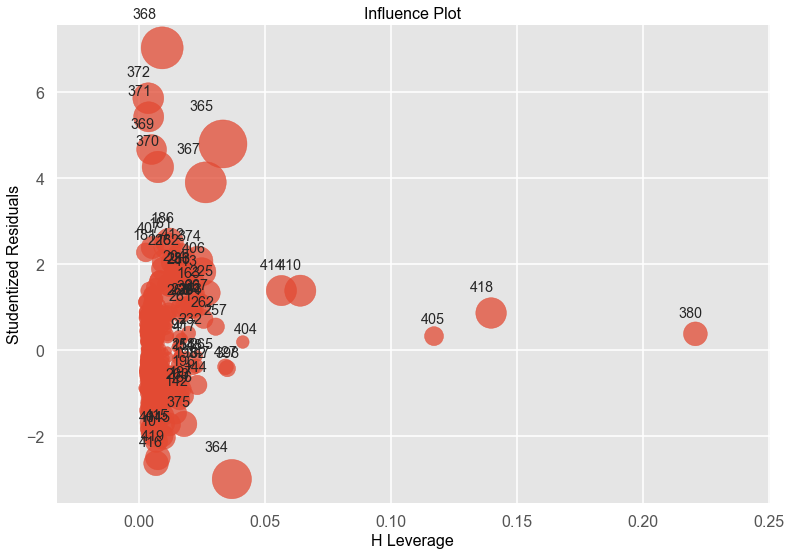

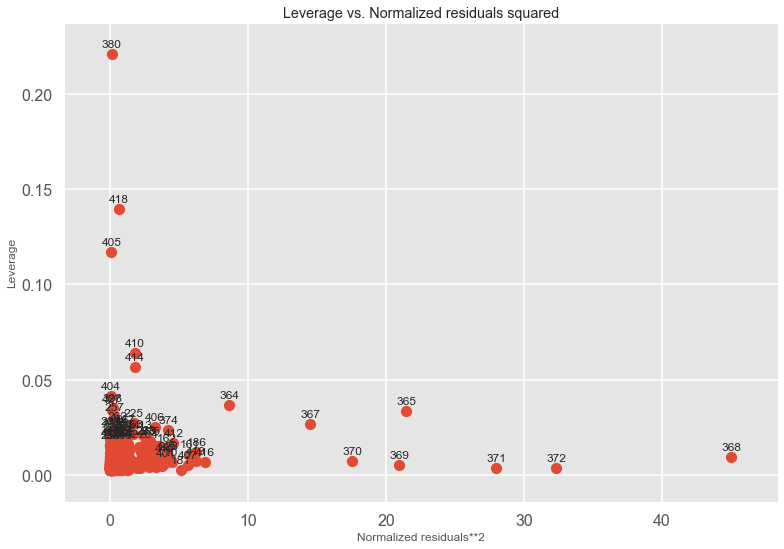

In [55]:
# construct an influence plot and a leverage plot to identify high leverage points in the data set
from statsmodels.graphics.regressionplots import *

# calling from fig to avoid duplication of graphs
fig = plt.figure()
fig = influence_plot(model3)

fig = plt.figure()
fig = plot_leverage_resid2(model3)

In [56]:
# creating new df without outliers using a Bonferroni test with value 0.1
bos_clean = bos[model3.outlier_test()['bonf(p)'] > 0.1]

# removing points with high leverage, as identified by leverage plot, in addition to already removed outliers
indexes = [364,380,418,405]
bos_clean = bos_clean[~bos_clean.index.isin(indexes)]

# checking number of observations removed
bos_clean.shape

(495, 14)

In [57]:
# running linear regression on clean dataframe without outliers and high leverage points
model_clean = ols('PRICE ~ CRIM + RM + PTRATIO', data=bos_clean).fit()
model_clean.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.724
Model:                            OLS   Adj. R-squared:                  0.722
Method:                 Least Squares   F-statistic:                     429.6
Date:                Wed, 27 Sep 2017   Prob (F-statistic):          7.61e-137
Time:                        18:01:41   Log-Likelihood:                -1459.7
No. Observations:                 495   AIC:                             2927.
Df Residuals:                     491   BIC:                             2944.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -8.2851      3.304     -2.508      0.012       -14.777    -1.793
CRIM          -0.2468      0.035     -7.096      0.000        -0.315    -0.178
RM             8.1765      0.338     24.181      0.000         7.512     8.841
PTRATIO       -1.0894      0.106    -10.233      0.000        -1.299    -0.880
==============================================================================
Omnibus:                       14.919   Durbin-Watson:                   1.030
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               24.294
Skew:                           0.209   Prob(JB):                     5.30e-06
Kurtosis:                       4.002   Cond. No.                         317.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Removing the outliers and the high leverage points has increased the performance of the model. The new $R^2$ value is .72, which is roughly the value reached when adding the extra predictor variables LSTAT and AGE. The lower AIC value also tells us that the new linear regression has gotten better.